In [155]:
## import libraries ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random

# Part 1

## 1a.

In [156]:
## Read in Apple dataset ##

import pandas as pd
from js import fetch

URL = "https://raw.githubusercontent.com/cctechsolutions/datasets/main/AppleStore.csv"

res = await fetch(URL)
text = await res.text()

filename = 'data.csv'

with open(filename, 'w') as f:
    f.write(text)

apple = pd.read_csv(filename, sep=',')

In [157]:
## Read in Google dataset ##

URL = "https://raw.githubusercontent.com/cctechsolutions/datasets/main/googleplaystore.csv"

res = await fetch(URL)
text = await res.text()

filename = 'data.csv'

with open(filename, 'w') as f:
    f.write(text)

google = pd.read_csv(filename, sep=',')

## 1b. and 1c.

In [158]:
## Subset the Apple data ##

apple = apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]

In [159]:
## Subset the Google data ##

google = google[['Category', 'Rating', 'Reviews', 'Price']]

# Part 2

## 2a.

In [160]:
## Check out the data types in Apple data frame ##

apple.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

In [161]:
## Check out the data types in Google data frame ##

google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

In [162]:
## Check unique values of the price column ##

googleproblems = google['Price'].unique()
googleproblems

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [163]:
## Check which data points have the value 'Everyone' for the 'Price' column ##

google[google['Price']=='Everyone']

,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


In [164]:
## Remove the row with the problematic value ## 

google = google.drop(10472)

In [165]:
## Re-check unique values of the price column ##

googleproblems = google['Price'].unique()
googleproblems

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [166]:
## Convert the price values to numeric ##

google['Price'] = pd.to_numeric(nosymb, errors='coerce')

In [167]:
## Check the type to make sure price is now numeric ##

google.dtypes

Category     object
Rating      float64
Reviews      object
Price       float64
dtype: object

In [168]:
## Convert the reviews values to numeric ##

google['Reviews'] = pd.to_numeric(google['Reviews'], errors='coerce')

In [169]:
## Check the type to make sure price is now numeric ##

google.dtypes

Category     object
Rating      float64
Reviews       int64
Price       float64
dtype: object

## 2b.

In [170]:
## Add the column 'Platform' to both datasets ##

apple['Platform'] = 'apple'
google['Platform'] = 'google'

In [171]:
apple.head()

,prime_genre,user_rating,rating_count_tot,price,Platform
0,Games,4.0,21292,3.99,apple
1,Productivity,4.0,161065,0.00,apple
2,Weather,3.5,188583,0.00,apple
3,Shopping,4.0,262241,0.00,apple
4,Reference,4.5,985920,0.00,apple


## 2c.

In [172]:
## Store the old column names of the Apple data frame ##

apple.columns = ['prime_genre', 'user_rating', 'rating_count_tot', 'price', 'Platform']
old_names = apple.columns

In [173]:
## Create a variable called new_names where you'll store the column names of the Google data frame ##

google.columns = ['Category', 'Rating', 'Reviews', 'Price', 'Platform']
new_names = google.columns

In [174]:
## Change the column names in the Apple dataset ##

old_names.columns = ['prime_genre', 'user_rating', 'rating_count_tot', 'price', 'Platform']\

new_names.columns = ['Category', 'Rating', 'Reviews', 'Price', 'Platform']

apple = apple.rename(columns=dict(zip(old_names, new_names)))

## 2d.

In [175]:
## Join the two datasets ##

df = google.append(apple, ignore_index = True)

<ipython-input-175-49adc0d697dc>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = google.append(apple, ignore_index = True)


In [176]:
## Check the merge by viewing a sample of the combined dataset ##

df.sample(12)

,Category,Rating,Reviews,Price,Platform
3,ART_AND_DESIGN,4.5,215644,0.00,google
1100,FINANCE,4.2,283,0.00,google
13020,Games,4.5,602,4.99,apple
12393,Education,0.0,0,9.99,apple
17463,Games,0.0,0,0.00,apple
5403,MEDICAL,4.9,25,0.00,google
11070,Games,5.0,882,9.99,apple
1346,HEALTH_AND_FITNESS,4.4,70769,0.00,google
2528,MEDICAL,4.7,6,0.00,google
14567,Games,4.5,4638,0.00,apple


## 2e.

In [177]:
## Check the dimensions of the new dataset ##

df.shape

(18037, 5)

In [178]:
## Drop all NaN values ##

df = df.dropna()

In [179]:
## Check the dimensions after dropping NaN values ##

df.shape

(16563, 5)

## 2f.

In [180]:
# Subset your df to pick out just those rows whose value for 'Reviews' is equal to 0. ##
# Do a count() on the result. 

column = df['Reviews'] 
count = column[column == 0].count()

count

929

In [187]:
## Eliminate the observations that have 0 reviews. ##
df = df.loc[df['Reviews'] != 0]

## 2g.

In [189]:
## Summarize data analytically the reviews column for each platform. ##

df.groupby('Platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


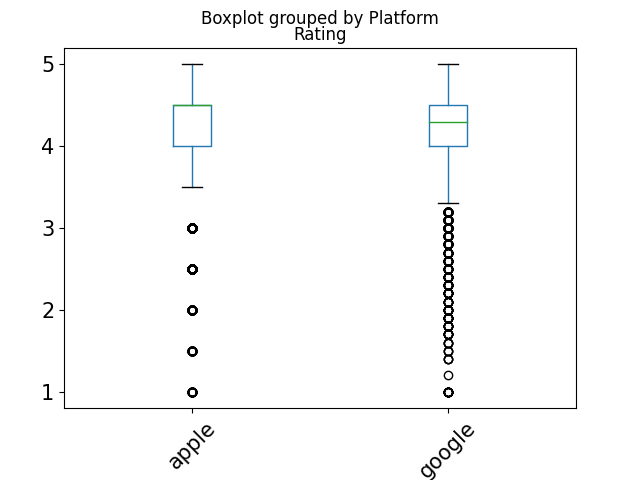

In [193]:
## Summarize data visually ##

df.boxplot(by='Platform', column ='Rating', grid=False, rot=45, fontsize=15)
plt.show()